In [ ]:
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
import tensorflow as tf
from tensorflow import keras

In [31]:
X_train, y_train = read_hoda_dataset(dataset_path='Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
 
X_test, y_test = read_hoda_dataset(dataset_path='Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

X_remaining, y_remaining = read_hoda_dataset(dataset_path='RemainingSamples.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

In [32]:
X_train, X_test, X_remaining = X_train / 255., X_test / 255., X_remaining / 255.

In [33]:
X_train.shape

(60000, 1024)

In [34]:
X_test.shape

(20000, 1024)

In [35]:
X_remaining.shape

(22352, 1024)

In [40]:
X_train = X_train.reshape(60000,32,32)
X_train.shape

(60000, 32, 32)

In [41]:
X_test = X_test.reshape(20000,32,32)
X_test.shape

(20000, 32, 32)

In [42]:
X_remaining = X_remaining.reshape(22352,32,32)

In [45]:
inputs = keras.Input(shape=(32, 32, 1))
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [46]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         7385

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 67s 47ms/step - loss: 0.3759 - accuracy: 0.8787 - val_loss: 0.1270 - val_accuracy: 0.9625
Epoch 2/10
1407/1407 [==============================] - 64s 45ms/step - loss: 0.1008 - accuracy: 0.9698 - val_loss: 0.0809 - val_accuracy: 0.9754
Epoch 3/10
1407/1407 [==============================] - 66s 47ms/step - loss: 0.0761 - accuracy: 0.9776 - val_loss: 0.0713 - val_accuracy: 0.9777
Epoch 4/10
1407/1407 [==============================] - 65s 46ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0633 - val_accuracy: 0.9807
Epoch 5/10
1407/1407 [==============================] - 65s 46ms/step - loss: 0.0511 - accuracy: 0.9850 - val_loss: 0.0572 - val_accuracy: 0.9827
Epoch 6/10
1407/1407 [==============================] - 67s 48ms/step - loss: 0.0428 - accuracy: 0.9871 - val_loss: 0.0474 - val_accuracy: 0.9860
Epoch 7/10
1407/1407 [==============================] - 65s 46ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0414 -

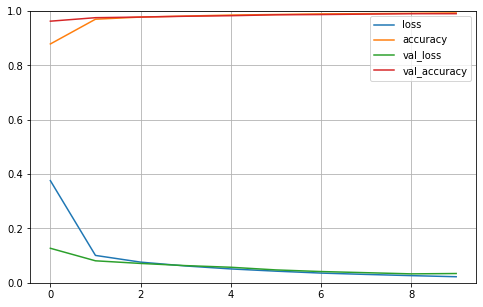

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()